## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [1]:
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)


## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file = r'/content/drive/MyDrive/AI Class/Projects/Project 2/Loan_Modelling.csv'
personal_loan_cmpgn = pd.read_csv(file)

Mounted at /content/drive


In [3]:
data = personal_loan_cmpgn.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
data.shape

(5000, 14)

In [6]:
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
data.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


## Data Overview

In [8]:
data.describe(include="all")

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [10]:
data.nunique()

,0
ID,5000
Age,45
Experience,47
Income,162
ZIPCode,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal_Loan,2


* Observations
* Sanity checks

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

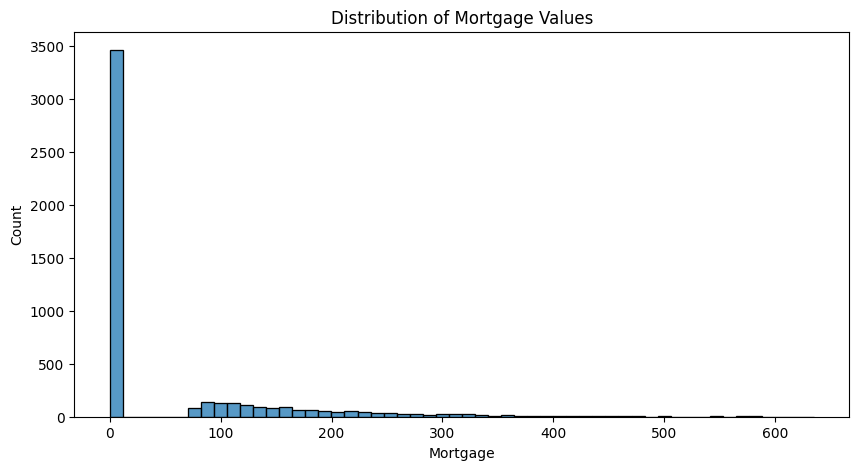

In [11]:
#1
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Mortgage')
plt.title("Distribution of Mortgage Values")
plt.show()

# using histplot to show the distribution of the mortgages
# most either dont have one or paid it off

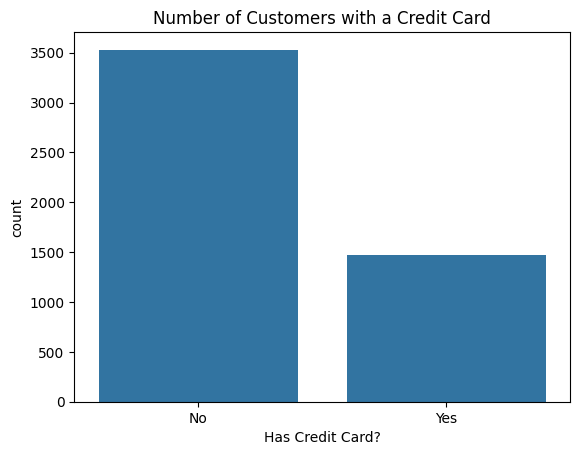

Number of customers with Credit Card: 1470


In [12]:
#2
sns.countplot(data=data, x='CreditCard')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('Has Credit Card?')
plt.title("Number of Customers with a Credit Card")
plt.show()

cust_with_cc = (data['CreditCard'] == 1).sum()
print(f"Number of customers with Credit Card: {cust_with_cc}")

#simple countplot to show the numbers of customers with a credit card vs not having one

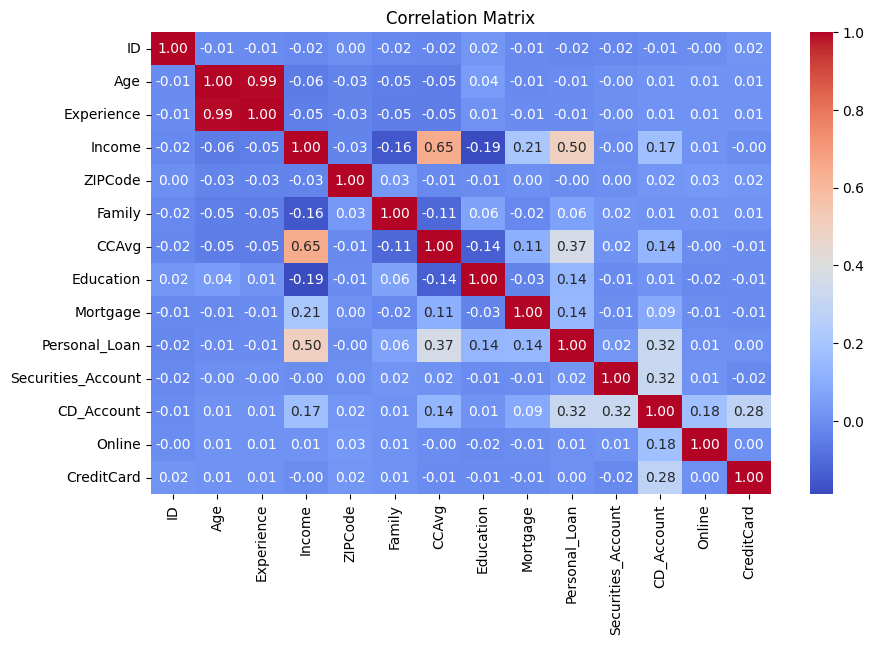

               Personal_Loan    Income     CCAvg  CD_Account  Experience
Personal_Loan       1.000000  0.502462  0.366889    0.316355   -0.007413
Income              0.502462  1.000000  0.645984    0.169738   -0.046574
CCAvg               0.366889  0.645984  1.000000    0.136534   -0.050077
CD_Account          0.316355  0.169738  0.136534    1.000000    0.010353
Experience         -0.007413 -0.046574 -0.050077    0.010353    1.000000


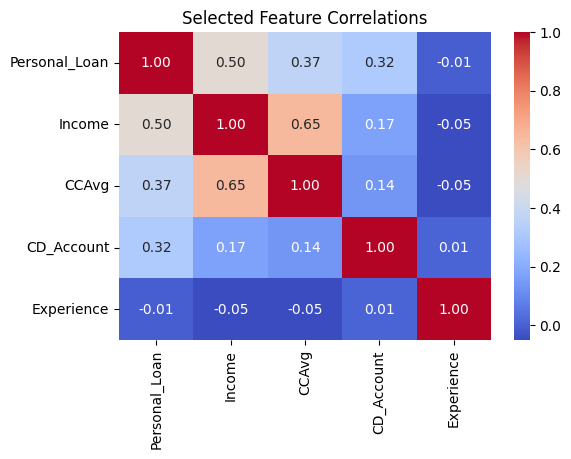

<Figure size 1200x800 with 0 Axes>

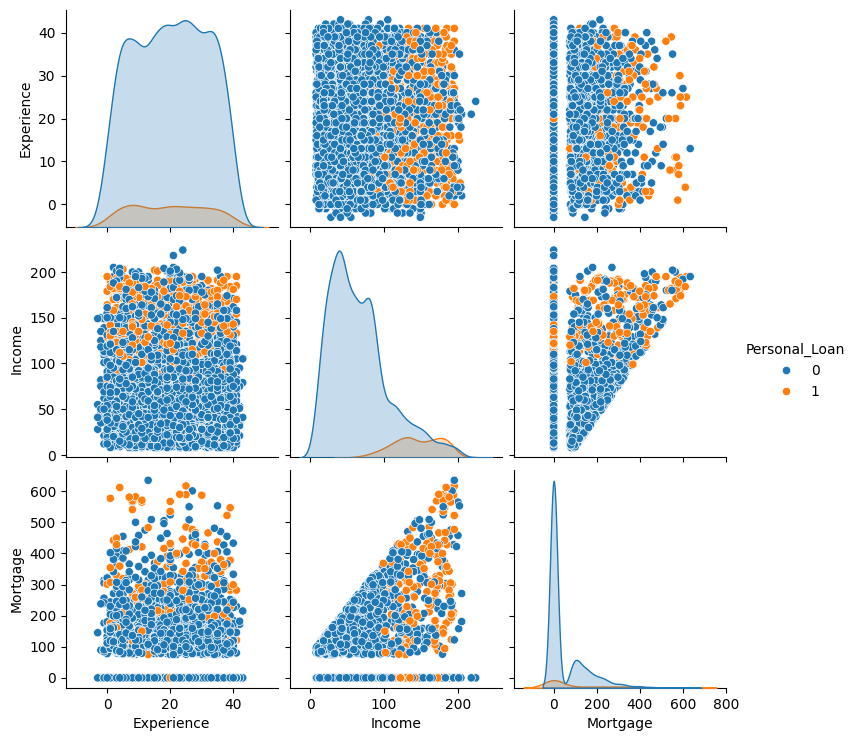

In [13]:
#3
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
## Displaying the corr matrix with all the vars then narrowing it down to only a few in the next corr matrix

post_correlation_matrix = data.corr()
selected_columns = ["Personal_Loan", "Income", "CCAvg", "CD_Account", "Experience"]
post_personal_loan_corr = post_correlation_matrix.loc[selected_columns, selected_columns]
print(post_personal_loan_corr)
plt.figure(figsize=(6, 4))
sns.heatmap(post_personal_loan_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Selected Feature Correlations")
plt.show()
## only showing the correlation that matters in this scenario so its easier on the eyes
## although experience doesnt have a favorable output, I believe it is important for the later half of the project

num_features = ['Experience', 'Income', 'Mortgage']
plt.figure(figsize=(12, 8))
sns.pairplot(data, vars=num_features, hue='Personal_Loan', diag_kind='kde');
## tried seeing if there is any correlation with the above 3 vars against personal loan
## found a somewhat interesting correlation with experience and mortgage and income and experience
## that those with very little exp and high income are more likely to have a loan
## and that people with little exp and a mortgage of ~300 or higher are likely to have a loan


<ipython-input-14-9d4a47b1ca95>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(labels, rotation=45)


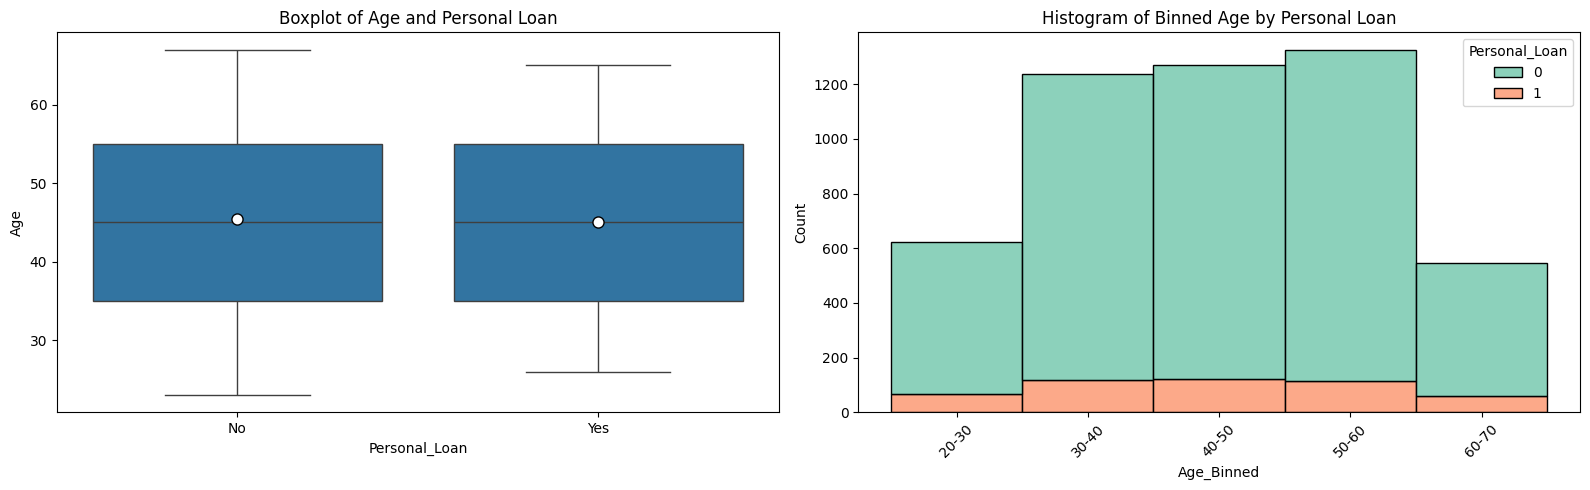

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
# data.drop(columns=['Age_Binned'], inplace=True)


# Boxplot of Age & Personal Loan
sns.boxplot(
    data=data,
    x='Personal_Loan',
    y='Age',
    ax=axes[0],
    showmeans=True,
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"}
)
axes[0].set_title("Boxplot of Age and Personal Loan")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Yes'])

# Histogram of Binned Age & Personal Loan
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
data_copy = data.copy()
data_copy['Age_Binned'] = pd.cut(data_copy['Age'], bins=bins, labels=labels, right=True)

sns.histplot(data_copy, x='Age_Binned', hue='Personal_Loan', palette='Set2', multiple='stack', ax=axes[1])
axes[1].set_title("Histogram of Binned Age by Personal Loan")
axes[1].set_xticklabels(labels, rotation=45)

plt.tight_layout()
plt.show()

#fairly straightforward plots, was trying to spice it but little but given the params needed only so much can be done

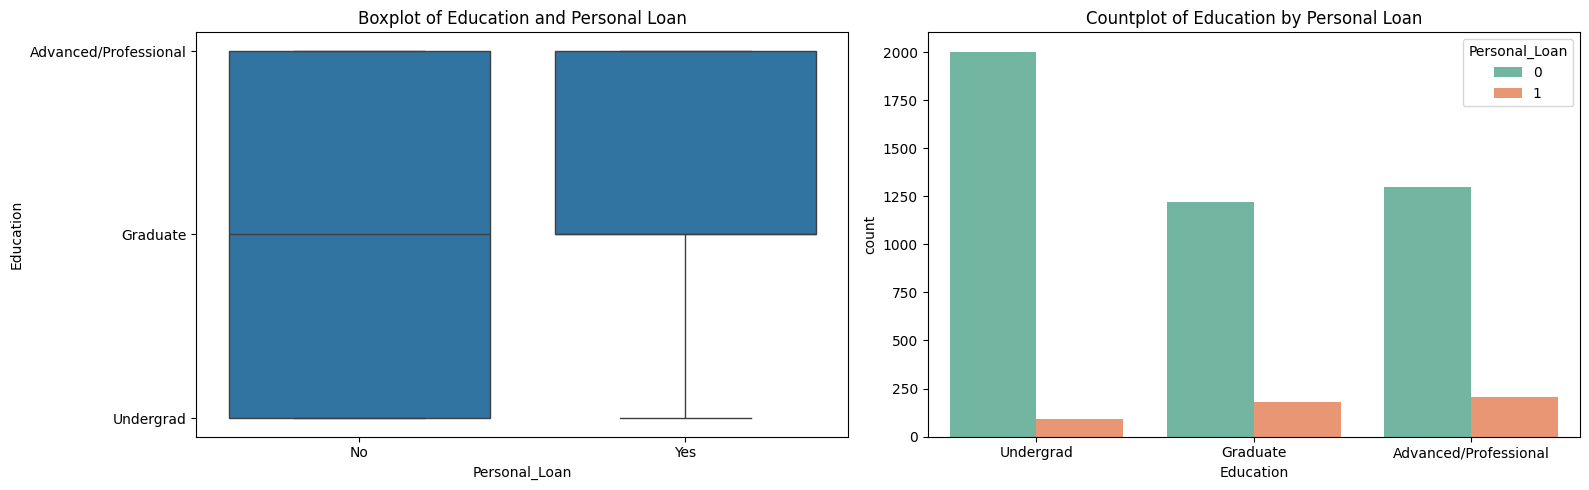

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Boxplot of Education & Personal Loan
sns.boxplot(data=data, x='Personal_Loan', y='Education', ax=axes[0])
axes[0].set_title("Boxplot of Education and Personal Loan")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Yes'])
axes[0].set_yticks([1, 2, 3])
axes[0].set_yticklabels(["Undergrad", "Graduate", "Advanced/Professional"])

# Countplot of Education & Personal Loan
sns.countplot(data=data, x='Education', hue='Personal_Loan', palette='Set2', ax=axes[1])
axes[1].set_title("Countplot of Education by Personal Loan")
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(["Undergrad", "Graduate", "Advanced/Professional"])

plt.tight_layout()
plt.show()

#again another 2 fairly straightforward plots, only fun was seeing people with higher degrees getting loans

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [16]:
#drop the customer id or any other var if it is not helping contribute to solving problem statement --> feature engineering

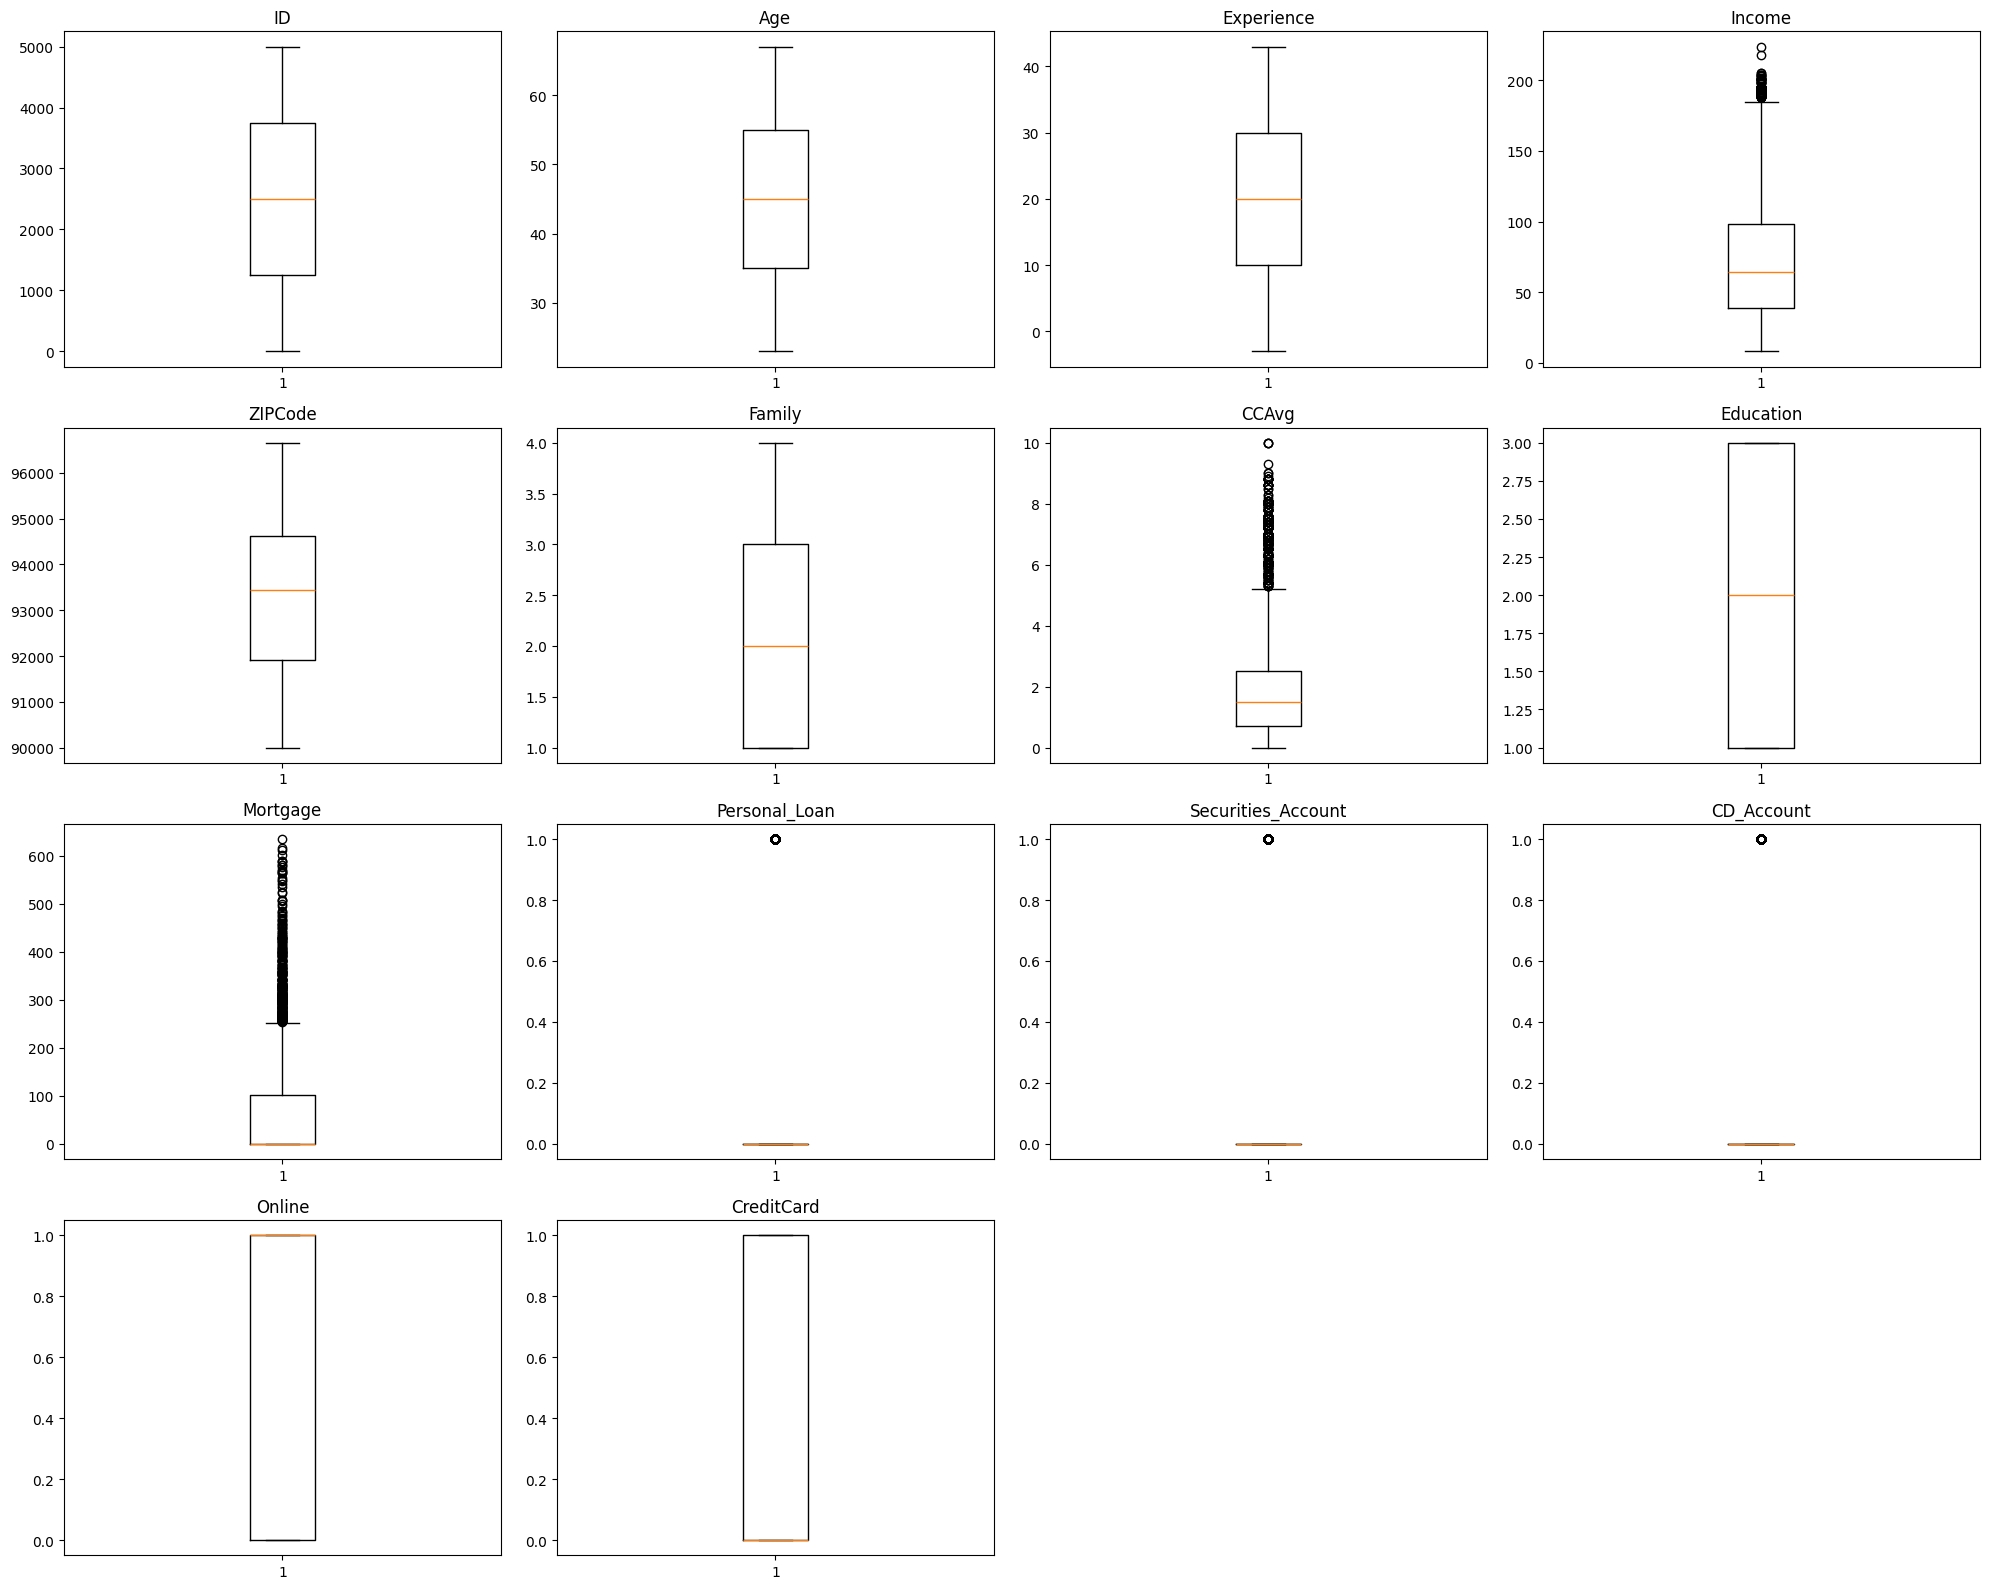

In [17]:
features = data.select_dtypes(include=['number']).columns.tolist()

n_cols = 4
n_rows = (len(features) // n_cols) + (1 if len(features) % n_cols != 0 else 0)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, variable in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.title(variable)
    plt.tight_layout()

plt.show()

#finding the outliers in the data using boxplots
#the attributes with 0 & 1 arent going to show much, fairly obvious why
#cant treat the outliers as this info would skew our findings on what people to target
#although we need to find liability customers so the only real outliers that might be removed would be income as the other categories are favorable

## Model Building

best accuracy and lowest over fit
segmentation and classification

### Model Evaluation Criterion

*


In [18]:
selected_features = ['Online', 'Securities_Account', 'Family', 'ZIPCode', 'ID', 'Personal_Loan']
X = data.drop(selected_features, axis=1)
Y = data["Personal_Loan"]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, stratify=Y, random_state=30
)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

## took out the selected features from the modeling since they werent much help, I had experience on there but realized it was a factor in the above boxplot so removed it

Shape of training set: (4000, 8)
Shape of test set: (1000, 8) 

Percentage of classes in training set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


### Model Building for decision tree

In [19]:
dtree1 = DecisionTreeClassifier(random_state=30)
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [20]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

    ## got the code from the hands on notebooks

In [21]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

  ## got the code from the hands on notebooks

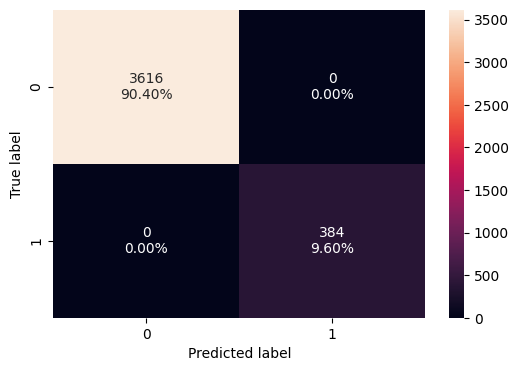

In [22]:
plot_confusion_matrix(dtree1, X_train, y_train)

In [23]:
dtree1_train_perf = model_performance_classification(
    dtree1, X_train, y_train
)
dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


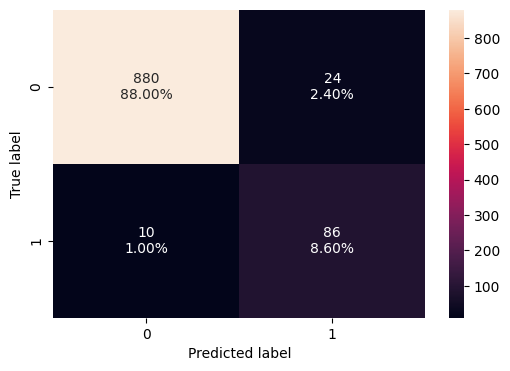

In [24]:
plot_confusion_matrix(dtree1, X_test, y_test)

In [25]:
dtree1_test_perf = model_performance_classification(
    dtree1, X_test, y_test
)
dtree1_test_perf

## thougth my model was wrong or something since the numbers returned were higher than what i had seen
## but apparently the testing material was off to a good star

,Accuracy,Recall,Precision,F1
0,0.966,0.895833,0.781818,0.834951


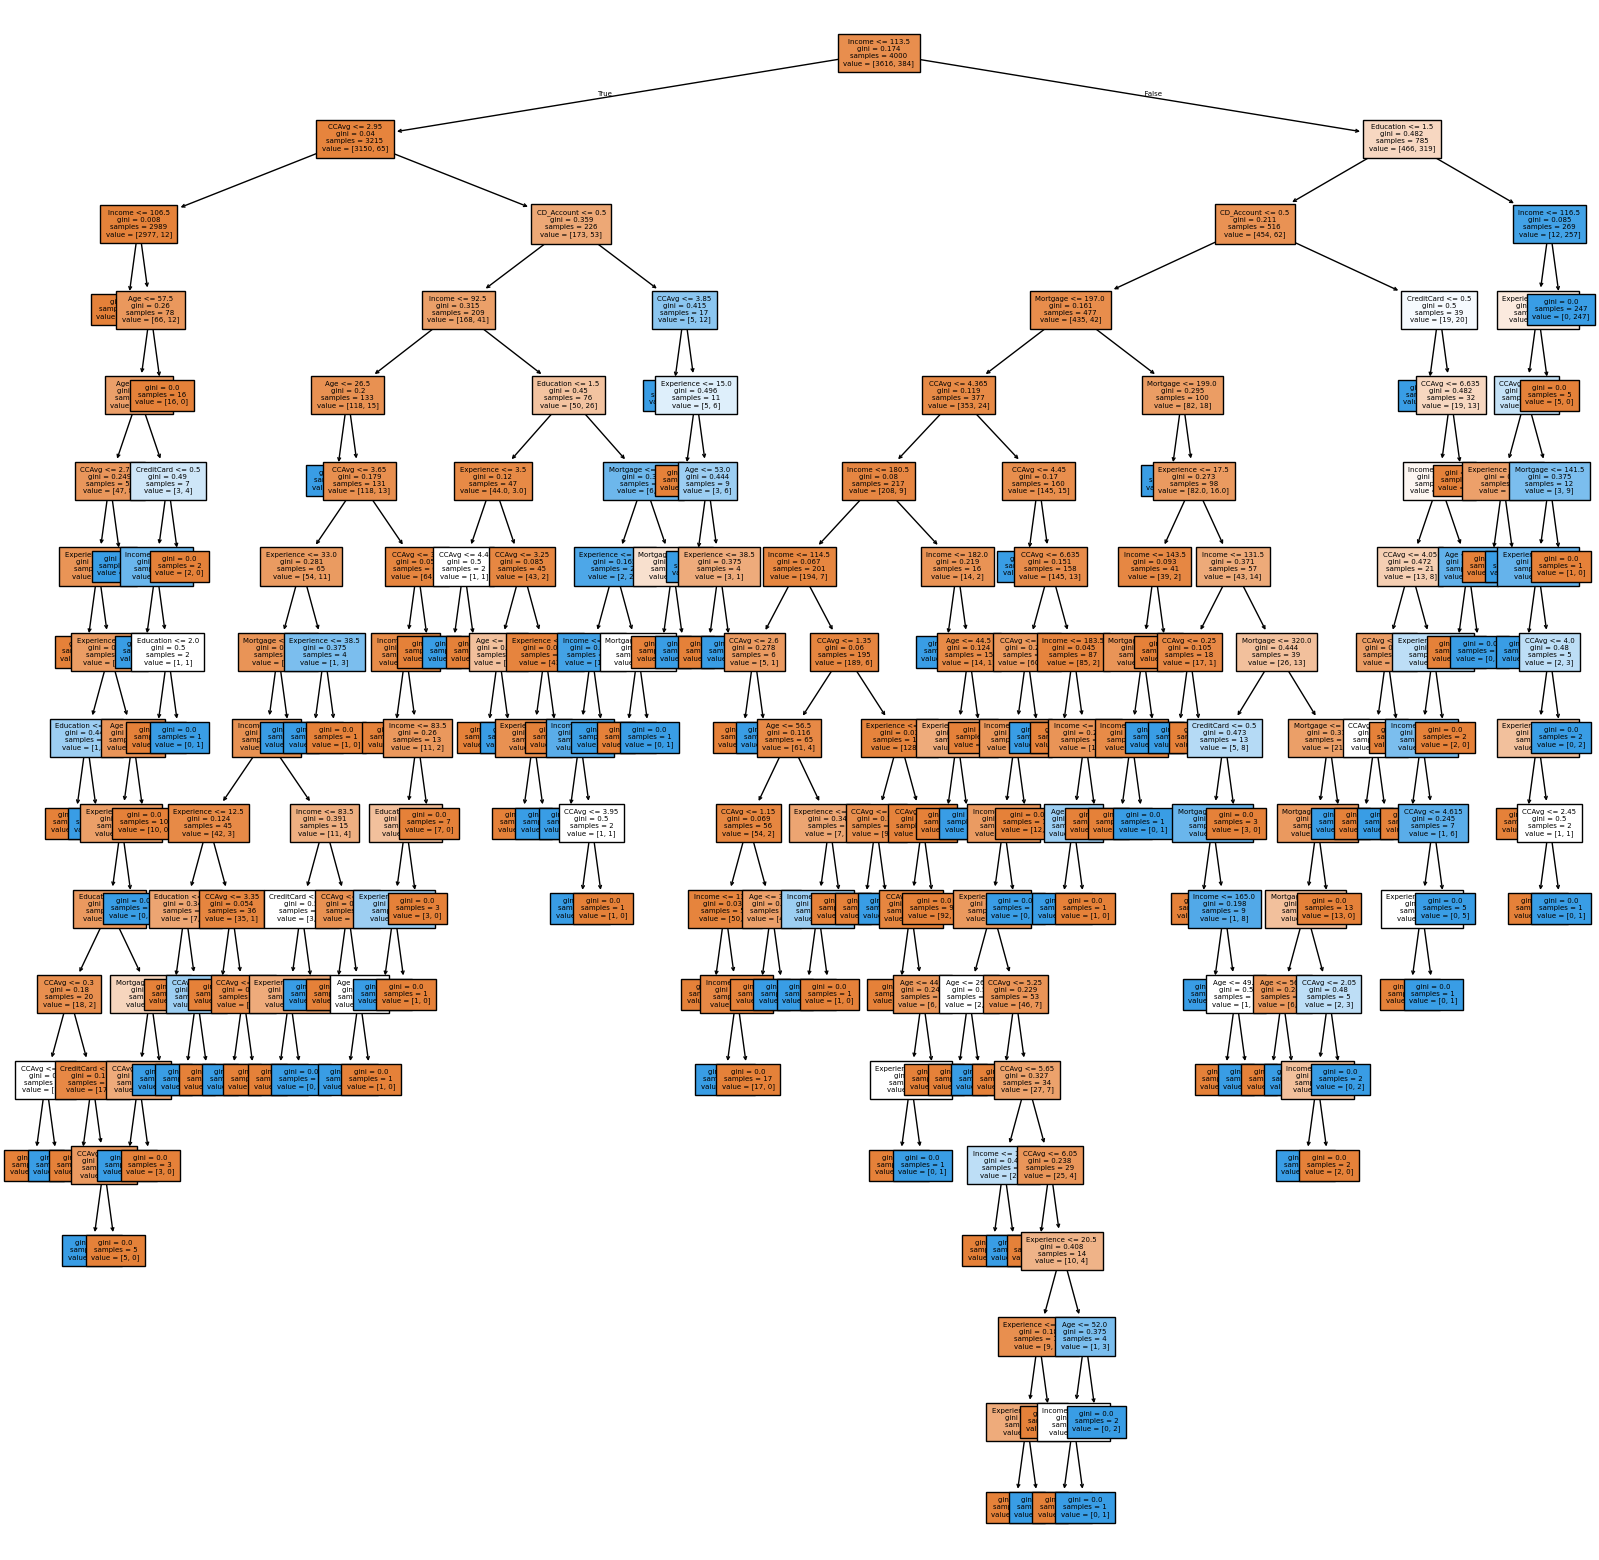

In [26]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree1,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=5,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

## got the code from the hands on notebooks
## very big tree, not a lot of conclusive end nodes, very few samples were in there so need to prune to get better results

## Model Performance Improvement for decision tree

In [27]:
max_depth_values = np.arange(3, 16, 2)
max_leaf_nodes_values = np.arange(10, 101, 15)
min_samples_split_values = np.arange(5, 31, 5)

best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=30
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

## got the code from the hands on notebooks
## changed the top 3 lines of code to better fit my current situation for the trees
## Setting max_depth between 3 and 15 allows a meaningful base model while allowing deeper trees to capture complex patterns
## Expanding max_leaf_nodes to 100 provides more flexibility for complex decision boundaries, while a larger step size of 15 balances thoroughness with computational efficiency.
## Lowering min_samples_split to 5 allows for more smaller splits to capture data patterns better, while stopping it at 30 to stop underfitting
## used chatgpt to help breakdown code and understanding and it helped me with the above 3 lines explaining the first 3 lines of code

In [28]:
# creating an instance of the best model
dtree2 = best_estimator

# fitting the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=40, min_samples_split=30,
                       random_state=30)

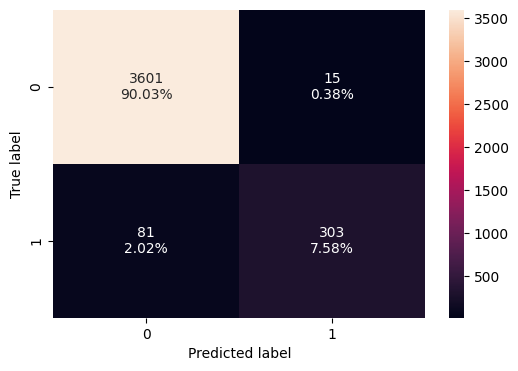

In [29]:
plot_confusion_matrix(dtree2, X_train, y_train)

In [30]:
dtree2_train_perf = model_performance_classification(
    dtree2, X_train, y_train
)
dtree2_train_perf

## obviously the training will go down since I pruned it but results are good thus far

,Accuracy,Recall,Precision,F1
0,0.976,0.789062,0.95283,0.863248


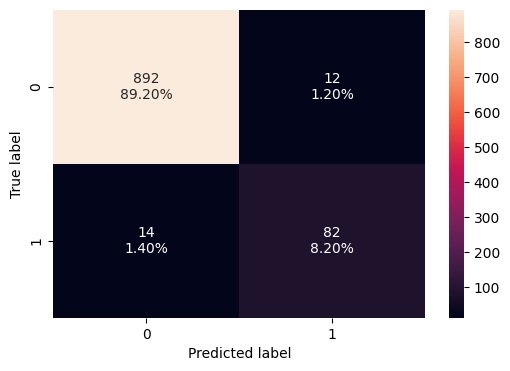

In [31]:
plot_confusion_matrix(dtree2, X_test, y_test)

In [32]:
dtree2_test_perf = model_performance_classification(
    dtree2, X_test, y_test
)
dtree2_test_perf
## acc went a tad, which was expected, recall went down as well, but precision and f1 both went up
## this means fewer FPs, and also means its capturing better info since the pruning, so getting more positives

,Accuracy,Recall,Precision,F1
0,0.974,0.854167,0.87234,0.863158


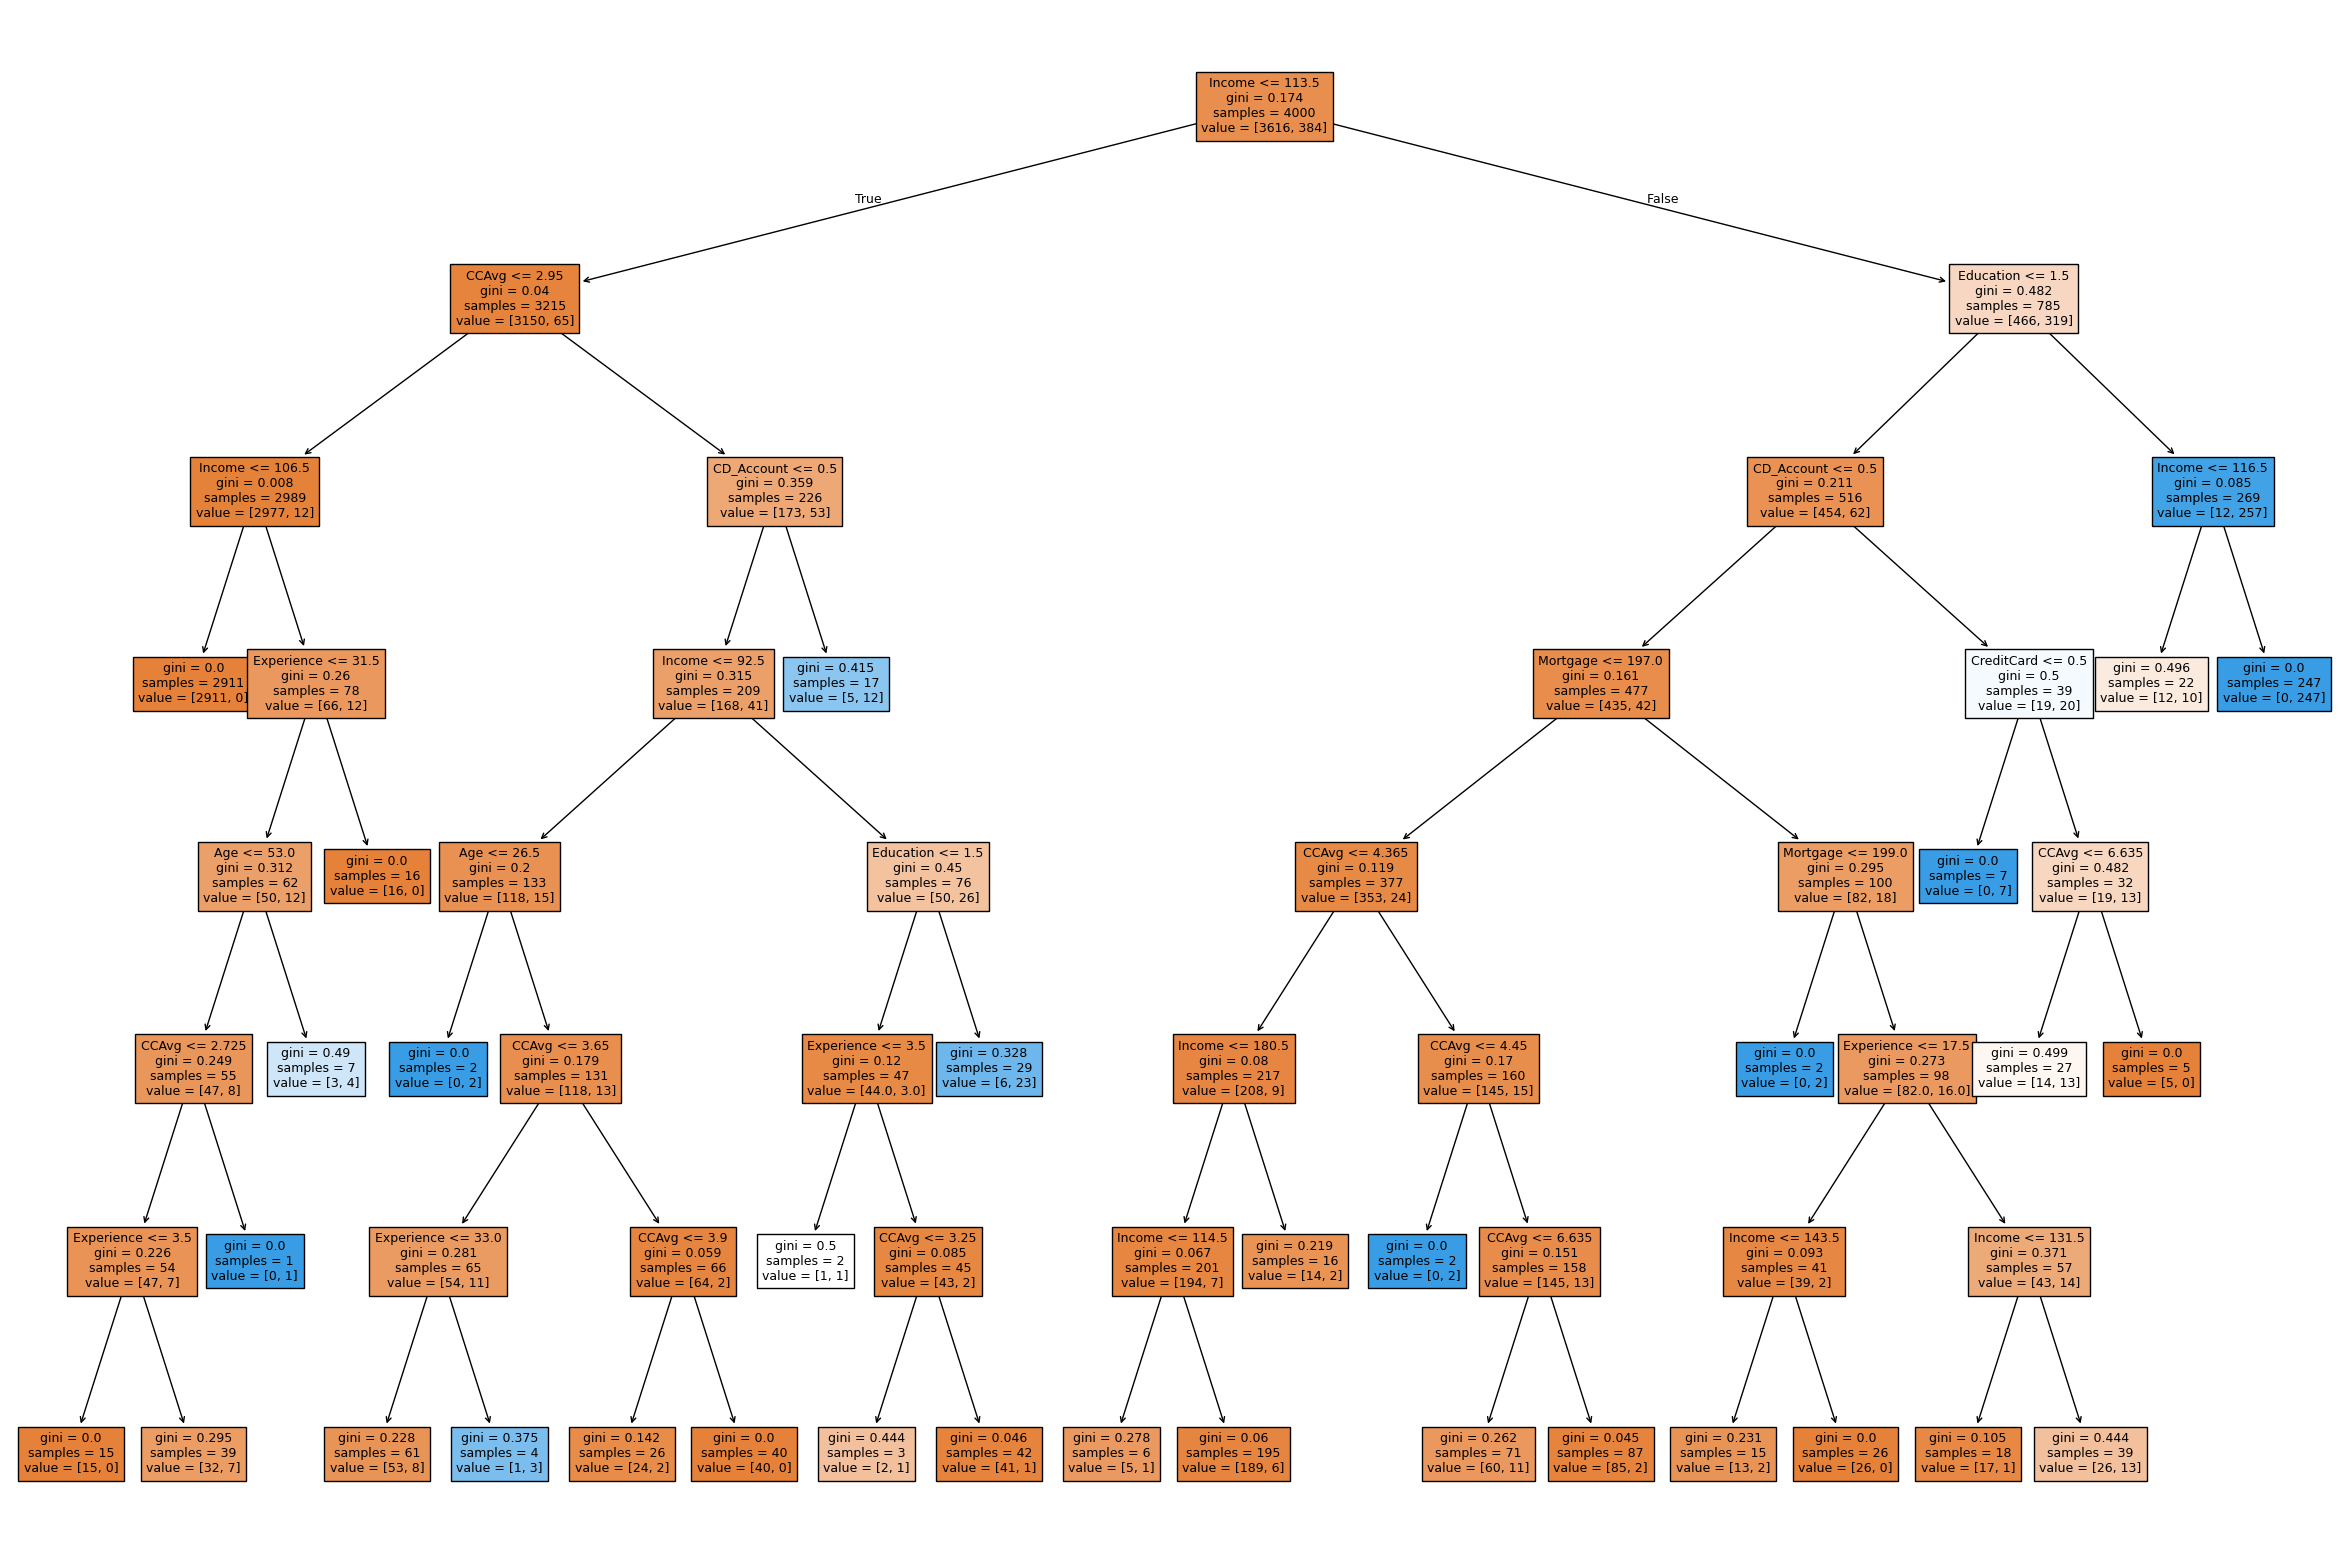

In [33]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(30, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree2,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

## got the code from the hands on notebooks
## the avg gini value i got was 0.15, which is pretty pure
## the samples sum was 3980, so around %79.6
## meaning i am getting good results and there is a market for targetting the liability customers for this project

In [34]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=30)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [35]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000124,0.000496
2,0.000158,0.000971
3,0.000167,0.001304
4,0.000188,0.001679
5,0.000194,0.002649
6,0.000200,0.003049
7,0.000214,0.003477
8,0.000217,0.003912
9,0.000222,0.004356


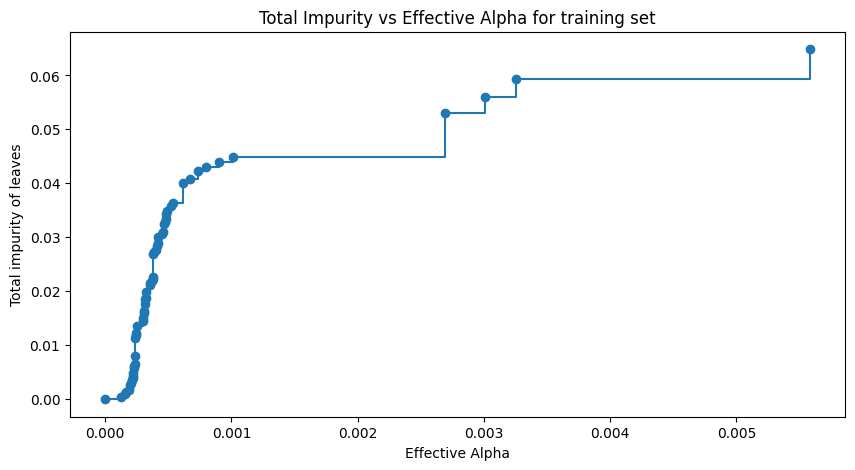

In [36]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

## got the code from the hands on notebooks
## seeing a steep increase in the impurity and increase in the alpha, meaning conclusive results

In [37]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=30)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)
## got the code from the hands on notebooks

Number of nodes in the last tree is 1 with ccp_alpha 0.054358770199701534


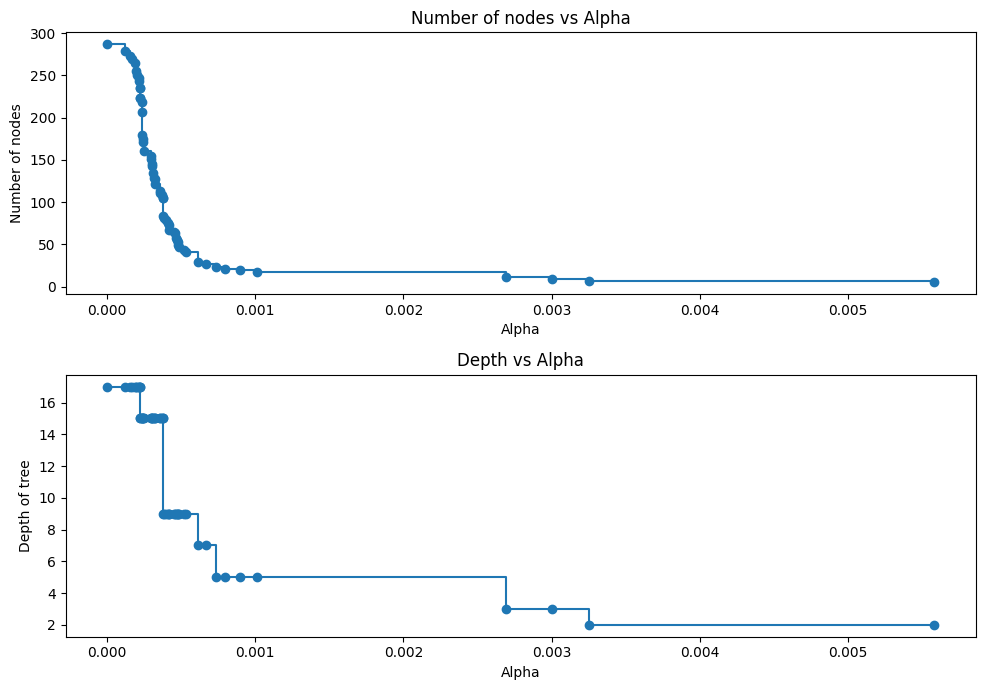

In [38]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

## got the code from the hands on notebooks
## number of nodes decreasing means it is finding the right customers to target and higher and purer results, not too much noise

In [39]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

## got the code from the hands on notebooks

In [40]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)

## got the code from the hands on notebooks

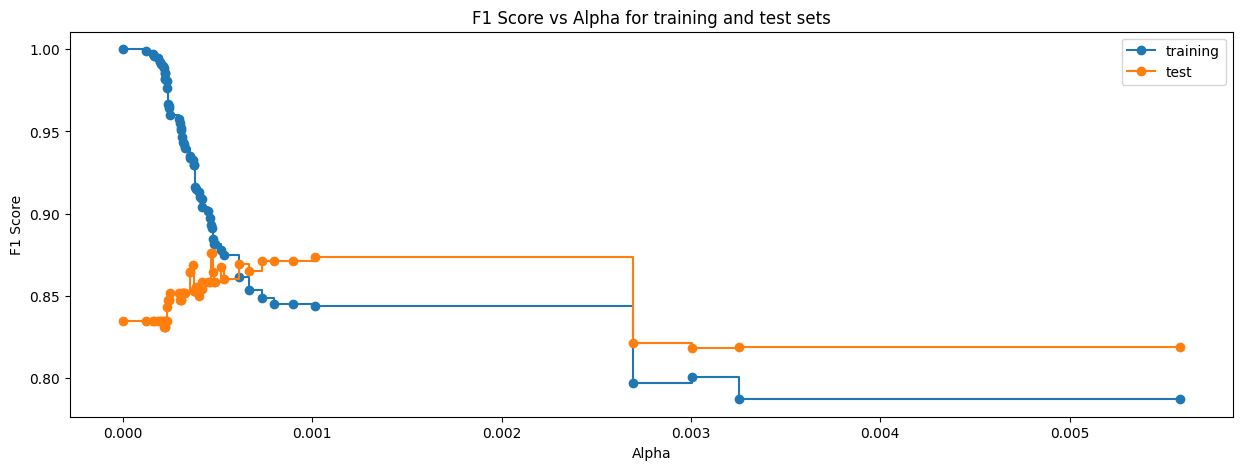

In [41]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

## got the code from the hands on notebooks
## although the test f1 score was higher, it being able to reach the same amount of alpha score with only 1000 customer data means model is working right

In [42]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=0.0004632352941176471, random_state=30)


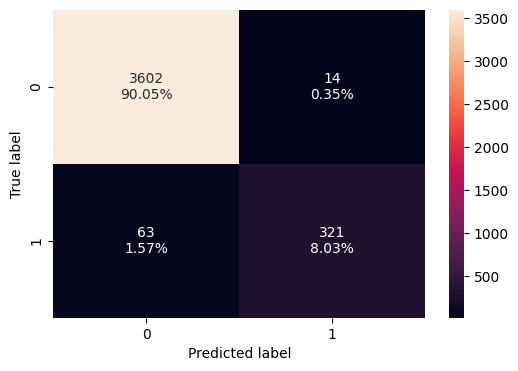

In [43]:
plot_confusion_matrix(dtree3, X_train, y_train)

In [44]:
dtree3_train_perf = model_performance_classification(
    dtree3, X_train, y_train
)
dtree3_train_perf

## from the training 2 data, the accuracy, recall, precision, and f1 went up
## this means the model is doing great at making predications, staying away from FNs & FPs

,Accuracy,Recall,Precision,F1
0,0.98075,0.835938,0.958209,0.892907


In [45]:
dtree3_test_perf = model_performance_classification(
    dtree3, X_test, y_test
)
dtree3_test_perf

## for the test data to improve too it means the model is not overfitting to the training data
## these are real improvements cementing this model as working

,Accuracy,Recall,Precision,F1
0,0.976,0.885417,0.867347,0.876289


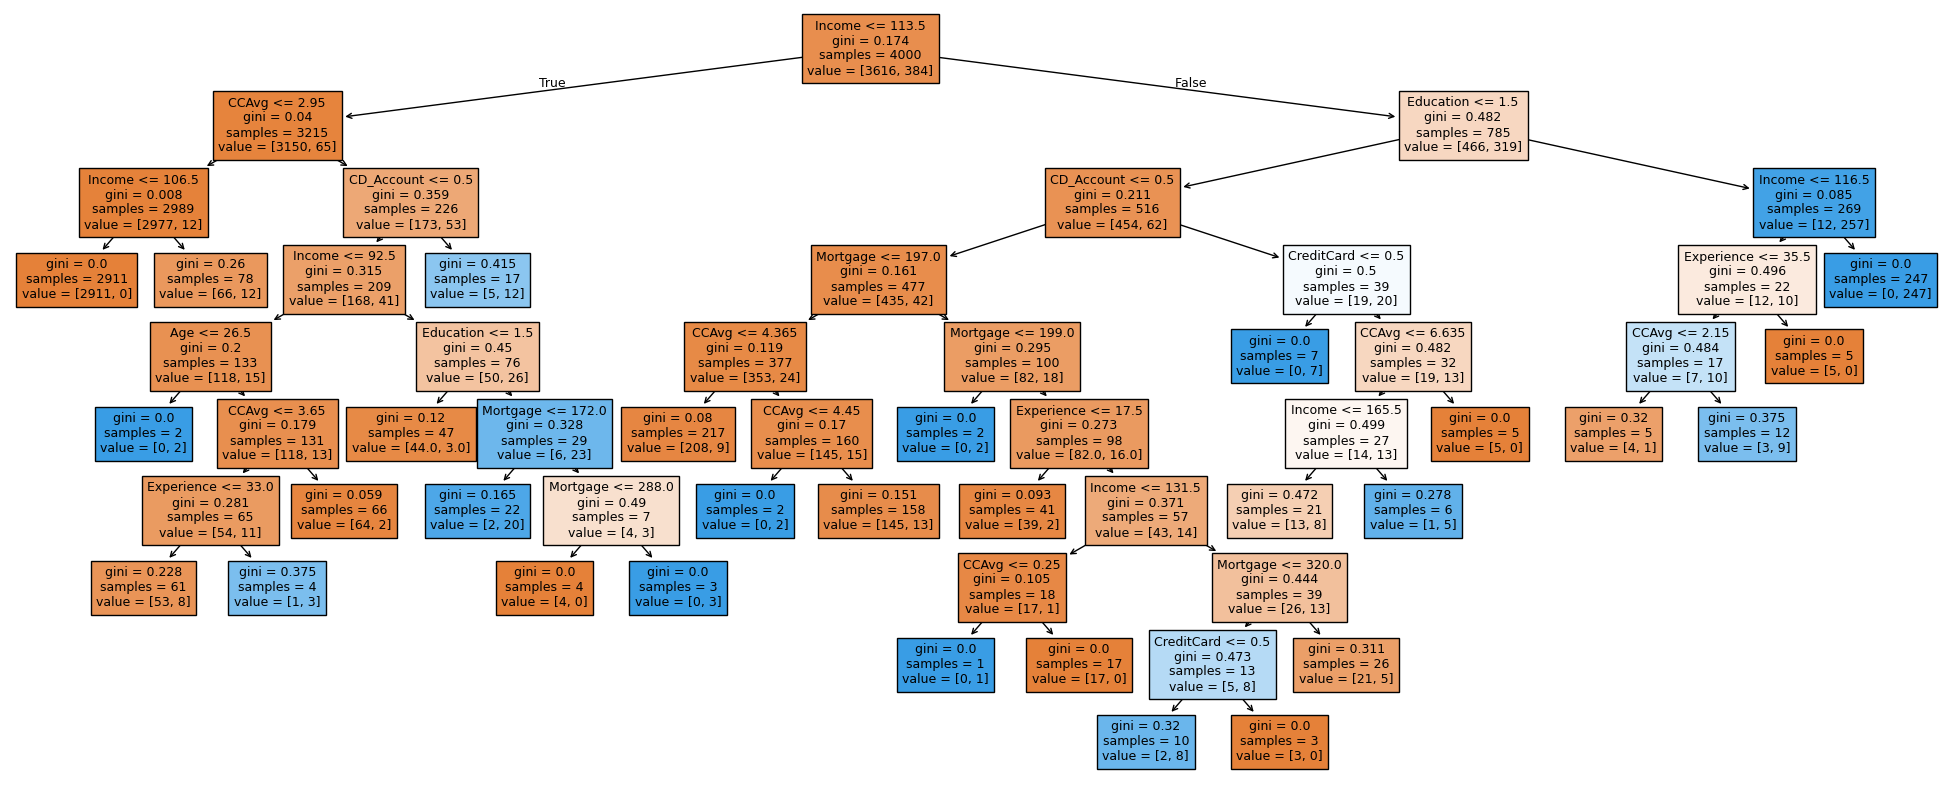

In [46]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(25, 10))

# plotting the decision tree
out = tree.plot_tree(
    dtree3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

## got the code from the hands on notebooks
## now the gini was has dropped to less than 0.1 i believe
## and the samples size has gone down to 3174 meaning its eliminating customers

## Model Performance Comparison and Final Model Selection for decision tree

In [47]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

## got the code from the hands on notebooks
## so applying pruning methods really helps the model learn better and yield better results

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.976000,0.980750
Recall,1.0,0.789062,0.835938
Precision,1.0,0.952830,0.958209
F1,1.0,0.863248,0.892907


In [48]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

## got the code from the hands on notebooks
## model was overfitting but since pruning it has not
## it has the highest f1 score
## this is getting the best balance between training and test performance

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.966000,0.974000,0.976000
Recall,0.895833,0.854167,0.885417
Precision,0.781818,0.872340,0.867347
F1,0.834951,0.863158,0.876289


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

In [49]:
# Primary High-Value Segments:

# Higher Income Customers
# Customers with annual incomes above $113,500 show significantly higher loan conversion rates
# This segment should be the highest priority target group


# Education & Income Combination
# Customers with advanced/professional degrees combined with higher income
# These customers likely have stable careers with growth potential and financial elegance, so theyll spend more


# Credit Card Power Users
# Customers with monthly credit card spending above $4.5K
# These customers are already comfortable with financial products and show spending capacity



# Secondary Opportunity Segments:

# Mortgage Holders with Moderate-to-High Income
# Customers who already have mortgages between $175K-$300K
# These customers are familiar with loan products and have established credit histories


# Family-Oriented Customers
# Customers with families of 3+ members and moderate-to-high income
# These customers may have more diverse financial needs including college planning


# Digital Banking Users
# Customers who use online banking services
# These customers are easier to reach through digital campaigns and typically more approachable



# Recommended Campaign Strategies

# Personalized Loan Offerings
# Create tiered loan products aligned with income brackets
# Tailor interest rates and terms based on customer profiles
# Emphasize benefits relevant to each segment's specific needs


# Multi-Channel Approach
# For digital banking users: targeted online promotions and app notifications
# For higher income/education segments: personalized banker consultations
# For credit card users: integrated offers with existing credit products


# Education-Based Marketing
# Develop educational content around smart borrowing and financial planning
# Host exclusive financial planning webinars for high-potential segments
# Position loans as strategic financial tools rather than just debt products


# Timing Optimization
# Target mortgage holders when they're approximately 2-3 years into their mortgage
# Consider seasonal campaign timing for family-oriented customers
# Align with periods of higher credit card usage for the CCAvg segment

___